# SYRIATEL CUSTOMER CHURN ANALYSIS

# BUSINESS UNDERSTANDING

SyriaTel, a telecommunication company is facing a challenge with increasing customer churn. They wish to get data-driven insights to understand the factors leading to the high churn rate and find ways to mitigate them. The analysis aims to use customer usage patterns, to identify customers that are at-risk of churning and factors that influence their decision to leave. By being able to predict churn and address customer’s concerns promptly we will be able to foster customer loyalty, satisfaction and reduce churn.

# PROBLEM STATEMENT

SyriaTel is struggling with an increasing churn among its customers. This has affected the company’s revenue and also led to increased costs in acquiring new customers. The company seeks data-driven insights to understand the underlying factors contributing to churn and to devise strategies to mitigate this issue. The objective is to develop predictive models capable of identifying at-risk customers and uncovering key patterns influencing their decision to leave. By anticipating churn and addressing customer concerns proactively, SyriaTel aims to foster loyalty, enhance customer satisfaction, and reduce churn rates.

# OBJECTIVES

1. To build a predictive model classifier that can forecast when a customer is likely to churn .
2. To identify patterns that lead to cutomer churn

# DATA UNDERSTANDING

In [1]:
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\HP 830 G6\Desktop\\PHASE 3\\SYRIATEL.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Our dataset has 21 columns containing information related to our customers. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
df.shape

(3333, 21)

# MODEL FEATURES

# DATA CLEANING

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [6]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
data_types = df.dtypes
data_types

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

This dataset has 21 columns; 4 categorical, 16 numerical and 1 of type bool(which is our target column) and 3333 rows/observations. The data doesn't seem to have any missing values. 

In [8]:
cols = df.columns
cols

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

# DATA VISUALIZATION

In [9]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In our dataset, 483 customers churned. This represents 14.5% of our data. We are dealing with an unbalanced dataset with one class having more variables. We will perform feature engineering to balance our training dataset before modelling.

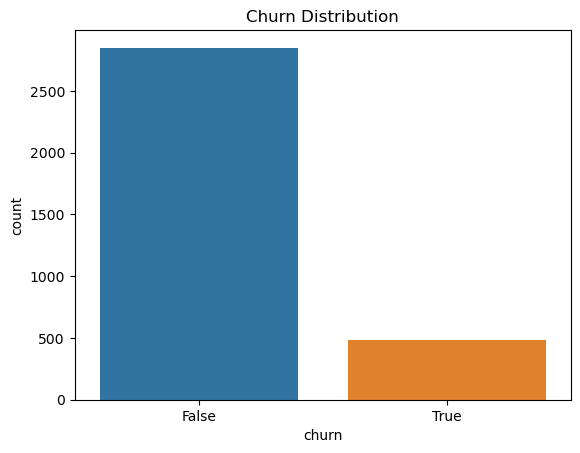

In [10]:
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

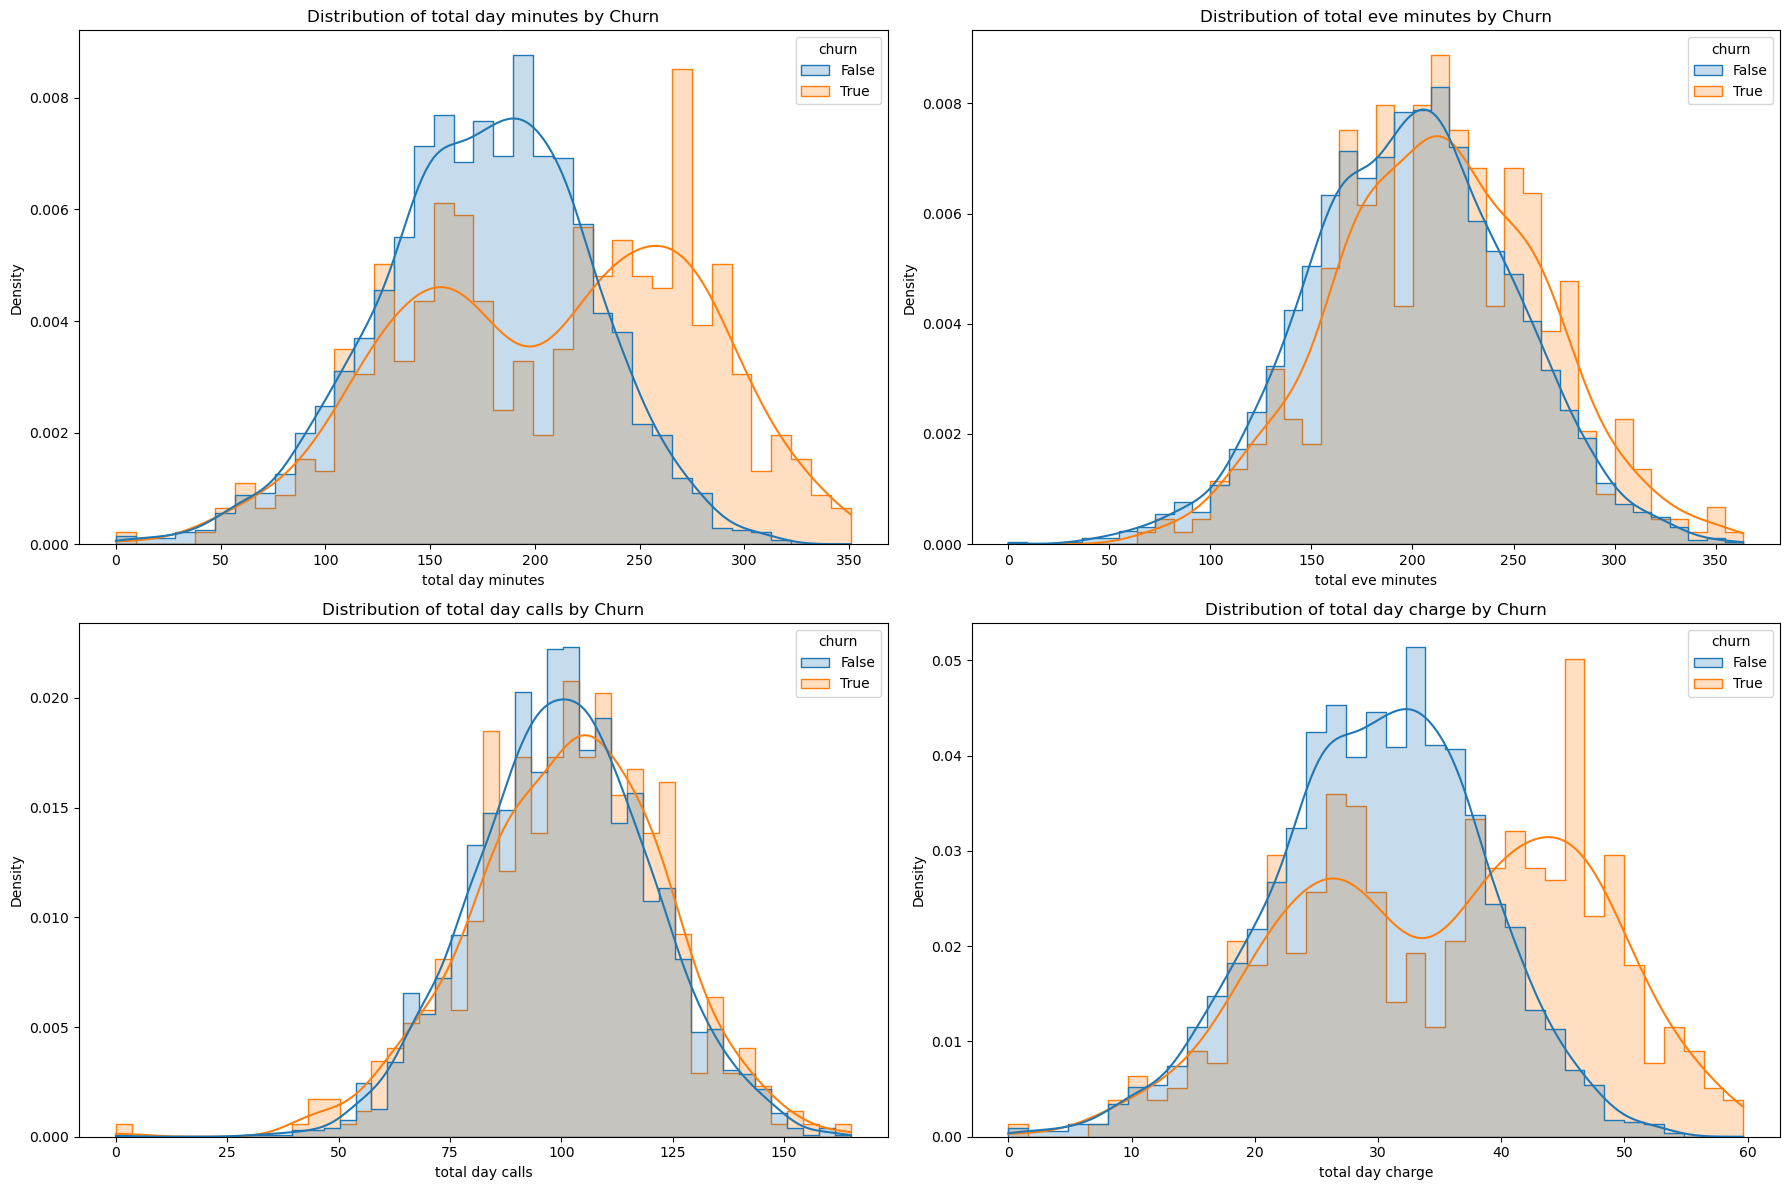

In [11]:
features = ['total day minutes', 'total eve minutes', 'total day calls', 'total day charge']

plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(x=feature, hue='churn', data=df, kde=True, palette="tab10", element="step", stat="density", common_norm=False)
    plt.title(f'Distribution of {feature} by Churn')

plt.tight_layout()
plt.show()

1. Total Day Minutes: Customers who churn tend to use significantly more day minutes compared to those who do not churn. This suggests a potential pain point or dissatisfaction related to daytime usage or charges.
2. Total Eve Minutes: While there's some overlap, churned customers also show a tendency towards higher evening minutes usage. However, the distinction is not as pronounced as with day minutes.
3. Total Intl Minutes: International minutes usage shows less clear differentiation between churned and retained customers, though there's a slight indication that higher international usage could correlate with churn.
4. Customer Service Calls: There's a noticeable trend where customers who make more service calls are more likely to churn. This is a strong indicator that the number of customer service calls may be directly related to customer dissatisfaction and churn.

# FEATURE ENGINEERING

In [12]:
df = df.drop(columns=['phone number'])
df.head()


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# Transforming churn rows into O and 1

In [13]:
df['churn'] = df['churn'].map({True: 1, False: 0}).astype(int)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


We transformed our churn column from its boolean data type to integer data type. We also replaced true and false with 0 and 1.

# ONE HOT ENCODING

We will transform categorical features into dummy variables as 0 and 1 to be able to use them in  our classification models

In [14]:
df = pd.get_dummies(df, columns=['state', 'area code', 'international plan', 'voice mail plan'])

df.replace({False: 0, True: 1}, inplace=True)
df.replace({False: 0, True: 1}, inplace=True)

df.head()



,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,1,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,1,0,0,1,1,0


# DATA SCALING

Scaling data involves transforming the values of multiple variables to a uniform range. In our case, we use Min-Max Normalization, implemented through MinMaxScaler, to mitigate the impact of outliers and standard deviation issues. This method ensures that all features have a consistent scale, promoting fair treatment and improved model performance

In [15]:
scaler = MinMaxScaler()

numeric_columns = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 
                   'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 
                   'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 
                   'total intl calls', 'total intl charge', 'customer service calls']

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()



,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,...,0,0,0,0,1,0,1,0,0,1
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,...,0,0,0,0,1,0,1,0,0,1
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,...,0,0,0,0,1,0,1,0,1,0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,...,0,0,0,1,0,0,0,1,1,0
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,...,0,0,0,0,1,0,0,1,1,0


# TRAIN TEST SPLIT

The train-test split is a technique used to evaluate the performance of machine learning models. In this process, the dataset is divided into two subsets: the training set and the testing set. The training set is used to train the model, while the testing set is kept separate and used to evaluate the model's performance on unseen data.  We will split our data into 75% training and 25% test split.

In [16]:
X = df.drop(columns=['churn'])  
y = df['churn']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)




X_train shape: (2499, 73)
X_test shape: (834, 73)
y_train shape: (2499,)
y_test shape: (834,)


# OVERSAMPLING

Our dataset is imbalanced, which means that a majority of values in the target variable belong to a single class.This class imbalance problem can lead to an underperforming machine learning model.We will oversample solely on the training dataset, as the test dataset must be representative of the true population

In [17]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("X_train_resampled shape:", X_train_resampled.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("y_train_counts:",y_train_resampled.value_counts() )

X_train_resampled shape: (4282, 73)
y_train_resampled shape: (4282,)
y_train_counts: churn
0    2141
1    2141
Name: count, dtype: int64


There are 2141 values in each class, which means our training set is now balanced.

# MODELLING

# LOGISTIC REGRESSION MODEL

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       709
           1       0.48      0.56      0.51       125

    accuracy                           0.84       834
   macro avg       0.70      0.73      0.71       834
weighted avg       0.85      0.84      0.85       834



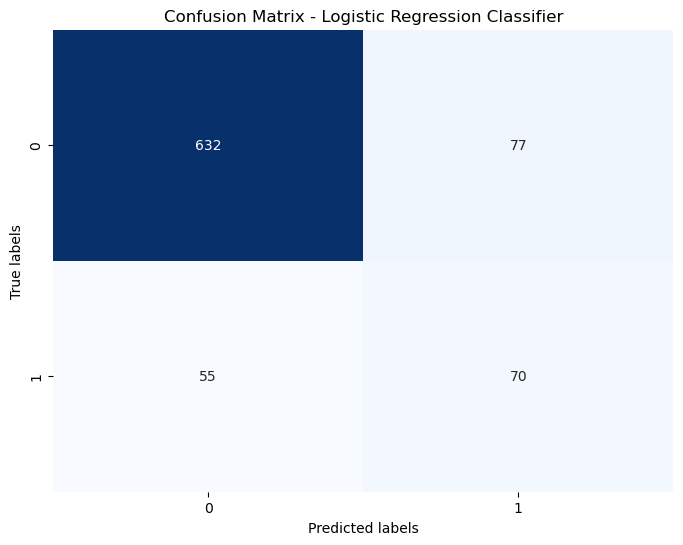

In [18]:
logistic_clf = LogisticRegression(random_state=42)
logistic_clf.fit(X_train_resampled, y_train_resampled)

logistic_preds = logistic_clf.predict(X_test)

print("Logistic Regression Classifier:")
print(classification_report(y_test, logistic_preds))

cm = confusion_matrix(y_test, logistic_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()


<Figure size 900x500 with 0 Axes>

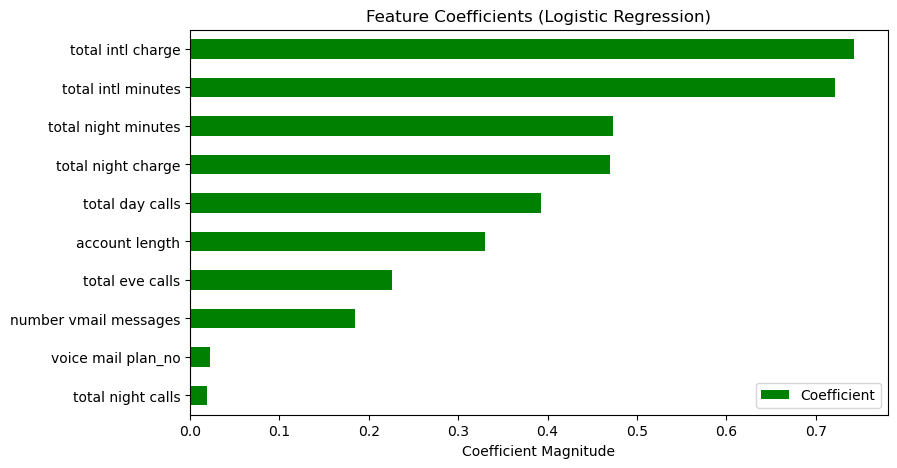

In [19]:
coefficients = logistic_clf.coef_[0]

importance_df_logreg = pd.DataFrame({"Coefficient": coefficients}, index=X_train.columns)

top_importance_df_logreg = importance_df_logreg.abs().sort_values(by="Coefficient", ascending=True).head(10)

plt.figure(figsize=(9, 5))
top_importance_df_logreg.plot(kind="barh", color="g", figsize=(9, 5))
plt.title("Feature Coefficients (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.show()


Logistic regression model will be our baseline. Our model is performing well with an accuracy of 0.84. 
This visualization helps identify the most influential features in the decision tree model, allowing you to understand which features have the greatest impact on the model's predictions. For our model, the most influential predictors were;
1. Total international charges 
2. Total international minutes
3. Total night minutes
4. Total night charge
5. Total day calls

# RANDOM FOREST CLASSIFIER

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       709
           1       0.77      0.75      0.76       125

    accuracy                           0.93       834
   macro avg       0.86      0.86      0.86       834
weighted avg       0.93      0.93      0.93       834



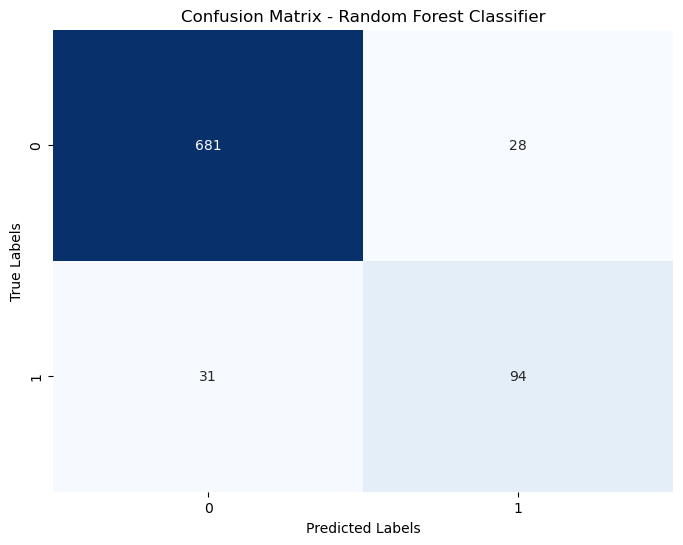

In [20]:
rf_classifier = RandomForestClassifier(random_state=42)

rf_classifier.fit(X_train_resampled, y_train_resampled)

y_pred = rf_classifier.predict(X_test)


print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()


<Figure size 900x500 with 0 Axes>

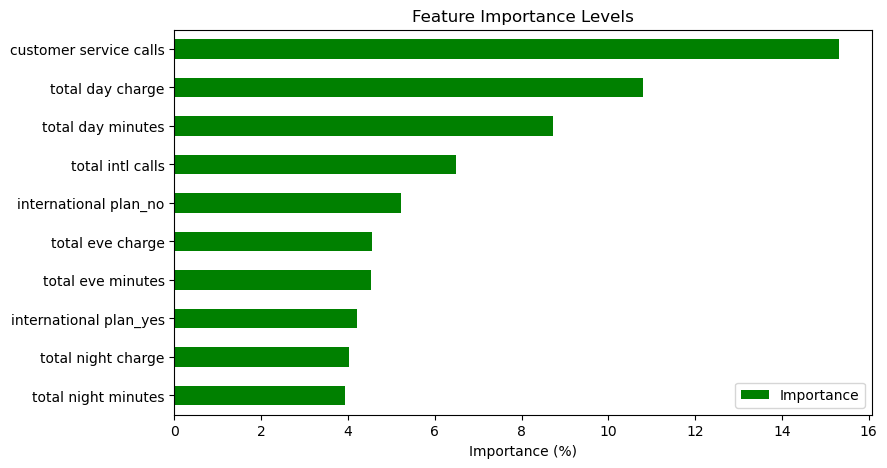

In [21]:
rf_classifier.fit(X_train_resampled, y_train_resampled)

importance_df = pd.DataFrame({"Importance": rf_classifier.feature_importances_ * 100}, index=X_train.columns)

top_importance_df = importance_df.sort_values(by="Importance", ascending=True).tail(10)

plt.figure(figsize=(9, 5))
top_importance_df.plot(kind="barh", color="g", figsize=(9, 5))
plt.title("Feature Importance Levels")
plt.xlabel("Importance (%)")
plt.show()


Our random frorest classifier achieved an accuracy score of 0.93. Our model has a higher accuracy and F1 score tha both logistic and decision tree models. Our most prominent features in our modelling are:
1. Customer service calls
2. Total day charge
3. Total day minutes
4. Total international minutes


# DECISION TREE CLASSIFIER

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       709
           1       0.54      0.73      0.62       125

    accuracy                           0.87       834
   macro avg       0.75      0.81      0.77       834
weighted avg       0.89      0.87      0.87       834



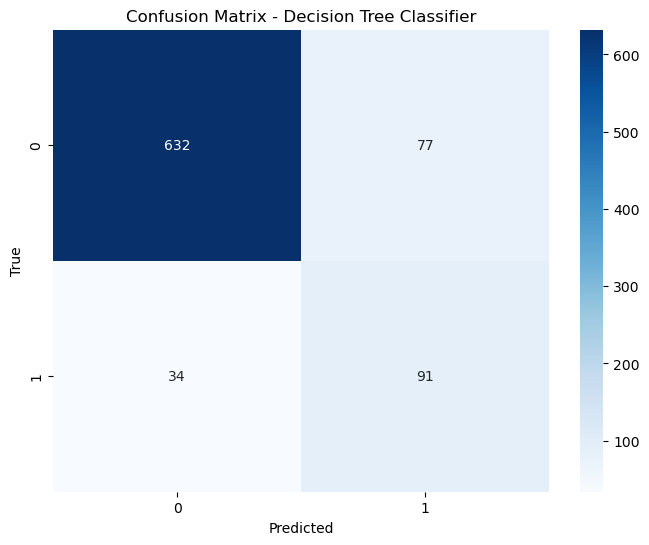

In [22]:

dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train_resampled, y_train_resampled)

y_pred = dt_clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


<Figure size 900x500 with 0 Axes>

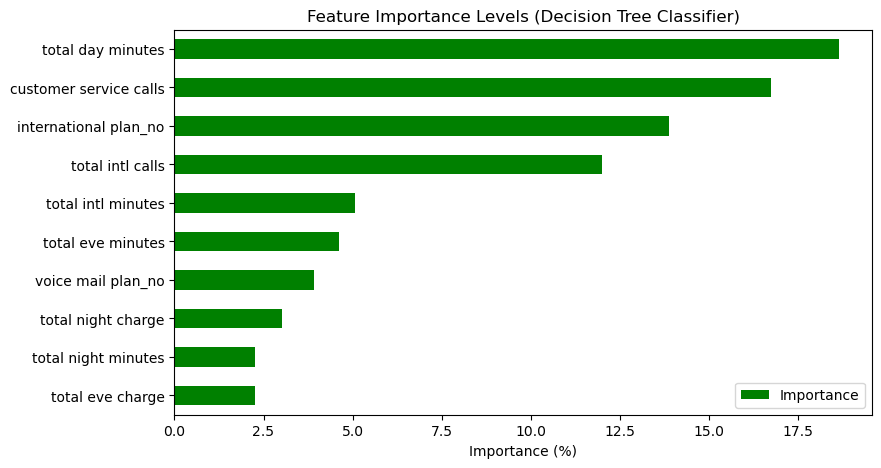

In [23]:
importance_df_dt = pd.DataFrame({"Importance": dt_clf.feature_importances_ * 100}, index=X_train.columns)

top_importance_df_dt = importance_df_dt.sort_values(by="Importance", ascending=True).tail(10)

plt.figure(figsize=(9, 5))
top_importance_df_dt.plot(kind="barh", color="g", figsize=(9, 5))
plt.title("Feature Importance Levels (Decision Tree Classifier)")
plt.xlabel("Importance (%)")
plt.show()


Our decision tree model has a accuracy of 0.87. The model performs averagely compared to our logistic and random forest classifiers. The most prominent feautures are:
1. Total day minutes
2. Customer service calls
3. International plan_no
4. Total internation calls
5. Total international minutes

# MODEL EVALUATION

The Receiver Operating Characteristic (ROC) curve comparison visually demonstrates the performance of the models in predicting customer churn. Each curve represents the trade-off between the true positive rate (sensitivity) and false positive rate (1 - specificity) at various threshold settings. The area under the curve (AUC) provides a measure of the model's ability to distinguish between churned and retained customers across all possible thresholds.  By comparing ROC-AUC curves of different models, we can determine which model performs better in terms of classifying positive and negative instances. This helps in selecting the most suitable model for a given task and understanding its trade-offs between sensitivity and specificity.

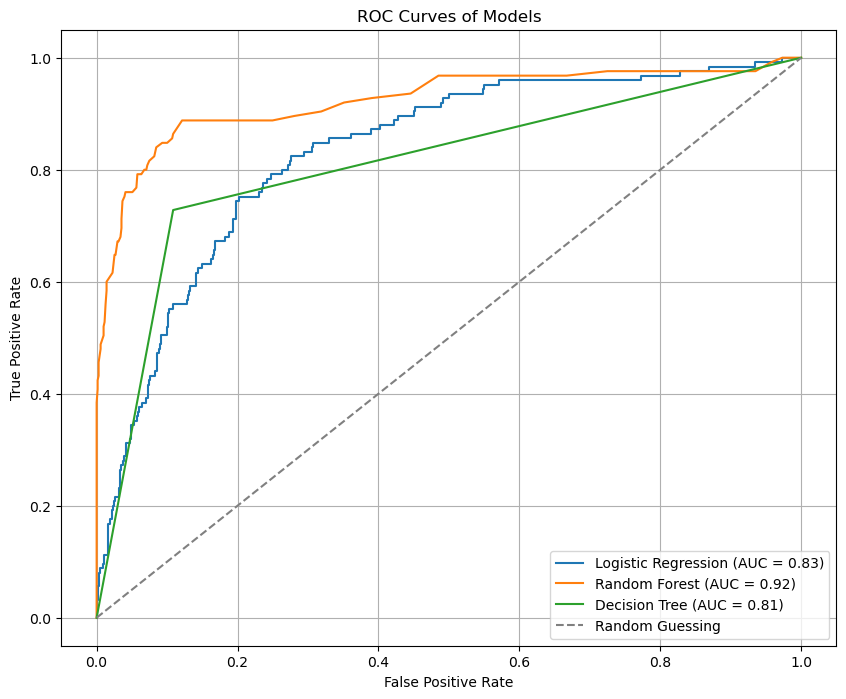

In [24]:
y_prob_logreg = logistic_clf.predict_proba(X_test)[:, 1]
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]
y_prob_dt = dt_clf.predict_proba(X_test)[:, 1]

fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(10, 8))

plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves of Models')
plt.legend()
plt.grid(True)
plt.show()


The random forest classifier demonstrates the highest AUC score(0.92), indicating superior performance in predicting customer churn compared to logistic regression(0.83) and decision tree models(0.81). However, logistic regression also shows reasonably good performance, while the decision tree model lags slightly behind in predictive accuracy.
Random Forest Classifier offers a strong balance between accuracy and the ability to distinguish between classes (as indicated by its ROC-AUC score), making it a robust choice for the churn prediction task.

# MODEL EVALUATION USING CROSS-VALIDATION

Cross-validation is a technique used to evaluate the performance of a machine learning model by partitioning the dataset into subsets, training the model on a subset, and testing it on the remaining data. In 5-fold cross-validation, the dataset is divided into 5 equal parts, and the model is trained and tested 5 times, each time using a different part as the testing set and the remaining parts as the training set. Scoring is a parameter that specifies the evaluation metric used to assess the model's performance, we will use  accuracy.

In [25]:
logistic_scores = cross_val_score(logistic_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("Cross-Validation Scores for Logistic Regression:")
print(logistic_scores)
print("Mean Accuracy:", logistic_scores.mean())

rf_scores = cross_val_score(rf_classifier, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("\nCross-Validation Scores for Random Forest:")
print(rf_scores)
print("Mean Accuracy:", rf_scores.mean())

dt_scores = cross_val_score(dt_clf, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

print("\nCross-Validation Scores for Decision Tree:")
print(dt_scores)
print("Mean Accuracy:", dt_scores.mean())


Cross-Validation Scores for Logistic Regression:
[0.73045508 0.88681447 0.89135514 0.89369159 0.89252336]
Mean Accuracy: 0.8589679276764196

Cross-Validation Scores for Random Forest:
[0.93582264 0.93115519 0.93691589 0.94275701 0.94392523]
Mean Accuracy: 0.9381151920958789

Cross-Validation Scores for Decision Tree:
[0.86464411 0.88798133 0.89836449 0.92056075 0.90186916]
Mean Accuracy: 0.8946839660192587


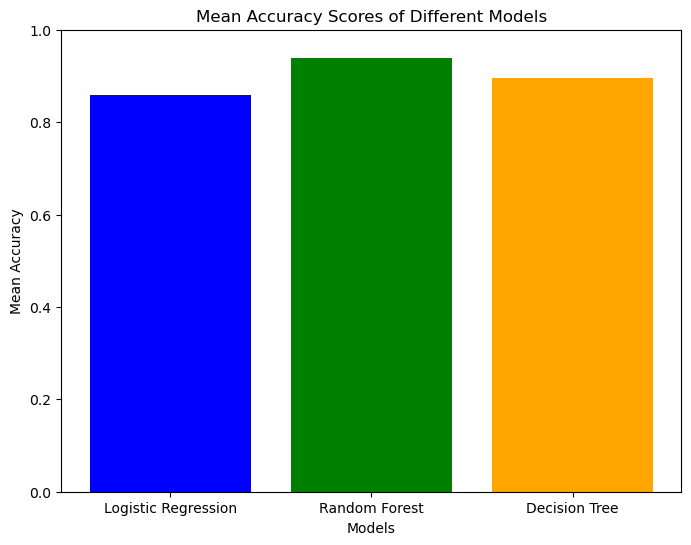

In [26]:
mean_scores = [logistic_scores.mean(), rf_scores.mean(), dt_scores.mean()]

models = ['Logistic Regression', 'Random Forest', 'Decision Tree']

plt.figure(figsize=(8, 6))
plt.bar(models, mean_scores, color=['blue', 'green', 'orange'])
plt.title('Mean Accuracy Scores of Different Models')
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.ylim(0, 1)  
plt.show()


1.Logistic Regression: The mean accuracy across the five folds is approximately 85.9%. While the accuracy varies slightly across folds, it generally indicates a decent performance level.

2.Random Forest: The mean accuracy is notably higher at around 93.8%. The model consistently performs well across all folds, indicating robustness and effectiveness in capturing patterns within the data.

3.Decision Tree: With a mean accuracy of approximately 89.5%, the decision tree model also demonstrates good performance. However, it seems slightly less consistent compared to the random forest model, as indicated by some variation in accuracy across folds.

Overall, the random forest model appears to be the most promising in terms of accuracy, followed by the decision tree and logistic regression models. However, further evaluation considering other metrics and potential trade-offs is recommended for a comprehensive understanding of each model's performance.

# HYPERPARAMETER TUNING OF RANDOM FOREST CLASIFIER USING RANDOMIZEDSEARCHCV

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       709
           1       0.81      0.74      0.78       125

    accuracy                           0.94       834
   macro avg       0.88      0.86      0.87       834
weighted avg       0.93      0.94      0.93       834



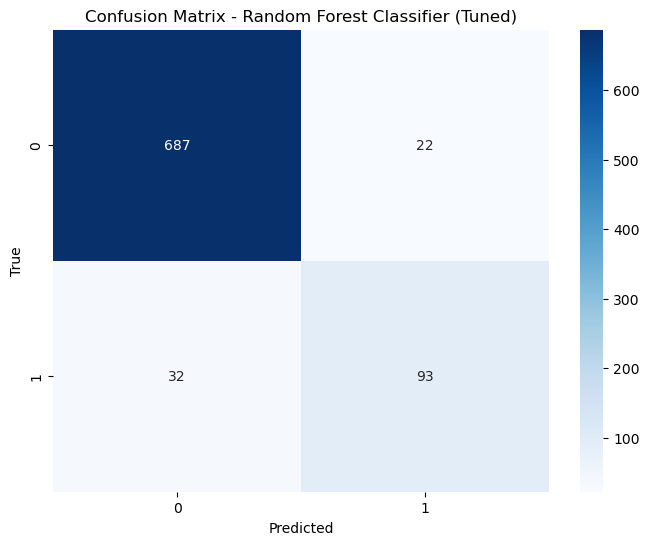

In [27]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300], 
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'bootstrap': [True, False]  
}


rf_classifier = RandomForestClassifier(random_state=42)


random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid, n_iter=100,
                                   cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

random_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", random_search.best_params_)

best_rf_classifier = random_search.best_estimator_

y_pred = best_rf_classifier.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Classifier (Tuned)')
plt.show()


After performing hyperparameter tuning using RandomizedSearchCV, the best set of hyperparameters for the Random Forest Classifier were determined to be: n_estimators: 300,min_samples_split: 2,min_samples_leaf: 1,max_depth: None,bootstrap: False.
These parameters indicate that the optimal Random Forest model should have 300 decision trees in the forest, with no restriction on the maximum depth of the trees and no bootstrapping.
With these parameters, the model achieved improved performance, as indicated by the classification report. The precision, recall, and F1-score metrics demonstrate the effectiveness of the tuned model in accurately predicting customer churn. Additionally, the confusion matrix provides insights into the model's ability to correctly classify churn and non-churn instances. Overall, the hyperparameter tuning process enhanced the random forest classifier's predictive power, enabling SyriaTel to make more informed decisions in mitigating customer churn.

# CONCLUSION AND RECOMMENDATIONS

Based on our analysis of te SyriaTel dataset. We can make conclusions and give recommendations to SyriaTel on how they can reduce churn

# CONCLUSIONS

Based on the analysis conducted on the SyriaTel telecommunication company's customer churn data, several conclusions can be drawn:

1. Model Performance: The Random Forest model outperformed both Logistic Regression and Decision Tree models in terms of accuracy, with an average accuracy score of approximately 94%. This indicates that Random Forest may be the most suitable model for predicting customer churn.

2. Feature Importance: Important features such as total international charges, total international minutes, total night minutes, total night charge, and total day calls were identified across various models. These features can significantly influence the likelihood of customer churn and should be closely monitored by SyriaTel.

3. Business Recommendations: Based on the identified influential features, SyriaTel should focus its efforts on addressing factors such as international call charges, nighttime usage patterns, and customer service calls to reduce churn rates. Implementing targeted retention strategies based on these insights can help enhance customer satisfaction and loyalty.

4. Further Analysis: Continuous monitoring and analysis of customer churn patterns are essential for SyriaTel to stay proactive in retaining its customer base. Additionally, exploring more advanced modeling techniques and incorporating additional data sources could further improve churn prediction accuracy.

Overall, by leveraging data-driven insights and predictive modeling techniques, SyriaTel can develop effective strategies to mitigate customer churn, foster customer loyalty, and ultimately improve its business performance.

# RECOMMENDATIONS

Based on the analysis of SyriaTel's customer churn data, the following recommendations can be provided:

1. Implement Targeted Retention Strategies: Utilize the identified influential features such as international call charges, nighttime usage patterns, and customer service calls to design personalized retention strategies for at-risk customers. Providing incentives or discounts for international calls, improving nighttime service quality, and offering proactive customer support can help mitigate churn.

2. Enhance Customer Experience: Focus on enhancing the overall customer experience by improving service quality, addressing customer complaints promptly, and offering personalized services based on individual preferences and usage patterns. Investing in customer service training and technology infrastructure can aid in delivering exceptional customer service.

3. Offer Value-Added Services: Introduce value-added services or loyalty programs to incentivize customers to stay with SyriaTel. These could include exclusive discounts, rewards for long-term customers, or access to premium features based on usage levels.

4. Monitor Customer Feedback: Implement mechanisms to gather and analyze customer feedback regularly. Pay attention to customer satisfaction metrics and sentiment analysis to identify areas for improvement and address customer concerns proactively.

5. Continuous Data Analysis: Continuously monitor and analyze customer churn patterns using advanced analytics techniques. Explore predictive modeling approaches and machine learning algorithms to forecast churn more accurately and identify emerging trends early on.

6. Customer Communication: Maintain open and transparent communication channels with customers. Keep them informed about service upgrades, new offerings, and any changes in pricing or terms to build trust and loyalty.

7. Evaluate Retention Strategies: Regularly evaluate the effectiveness of retention strategies and iterate based on performance metrics. Continuously refine approaches based on real-time data insights and feedback from customers.

By implementing these recommendations, SyriaTel can proactively reduce churn rates, improve customer satisfaction and loyalty, and ultimately drive business growth and profitability.